# **Preprocessing, Feature Engineering, Feature Selection**

In [39]:
import pandas as pd

df = pd.read_csv("AAPL.csv", skiprows=3, header=None)
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']].set_index('Date')

**Lags**

In [40]:
df['Close_lag1'] = df['Close'].shift(1)  # Yesterday’s closing price
df['Close_lag5'] = df['Close'].shift(5)  # Last week's closing price
df['Close_lag22'] = df['Close'].shift(22)  # Last month's closing price
df['Close_lag66'] = df['Close'].shift(66)  # Quarter's closing price

df['Volume_lag1'] = df['Volume'].shift(1)  # Volume from 1 days ago
df['Volume_lag5'] = df['Volume'].shift(5)  # Volume from 5 days ago
df['Volume_lag22'] = df['Volume'].shift(22)  # Volume from 22 days ago
df['Volume_lag66'] = df['Volume'].shift(66)  # Volume from 66 days ago

**Returns**

In [41]:
df['return_1d'] = df['Close'].pct_change()         # Daily return
df['return_5d'] = df['Close'].pct_change(5)        # 5-day return
df['return_22d'] = df['Close'].pct_change(22)      # 22-day return
df['return_66d'] = df['Close'].pct_change(66)      # 66-day return


**Moving Averages**

In [42]:
df['ma_5'] = df['Close'].rolling(window=5).mean()
df['ma_22'] = df['Close'].rolling(window=22).mean()
df['ma_66'] = df['Close'].rolling(window=66).mean()

**Volatility**

In [43]:
df['volatility_5'] = df['Close'].rolling(window=5).std()
df['volatility_22'] = df['Close'].rolling(window=22).std()
df['volatility_66'] = df['Close'].rolling(window=66).std()

**Momentum**

In [44]:
df['momentum_5'] = df['Close'] - df['Close'].shift(5)
df['momentum_22'] = df['Close'] - df['Close'].shift(22)
df['momentum_66'] = df['Close'] - df['Close'].shift(66)

In [45]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Close_lag1', 'Close_lag5',
       'Close_lag22', 'Close_lag66', 'Volume_lag1', 'Volume_lag5',
       'Volume_lag22', 'Volume_lag66', 'return_1d', 'return_5d', 'return_22d',
       'return_66d', 'ma_5', 'ma_22', 'ma_66', 'volatility_5', 'volatility_22',
       'volatility_66', 'momentum_5', 'momentum_22', 'momentum_66'],
      dtype='object')

In [46]:
from sklearn.preprocessing import MinMaxScaler

features = df.drop(columns=['Close'])  # Drop target
target = df['Close']

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(features)
y_scaled = scaler_y.fit_transform(target.values.reshape(-1, 1))

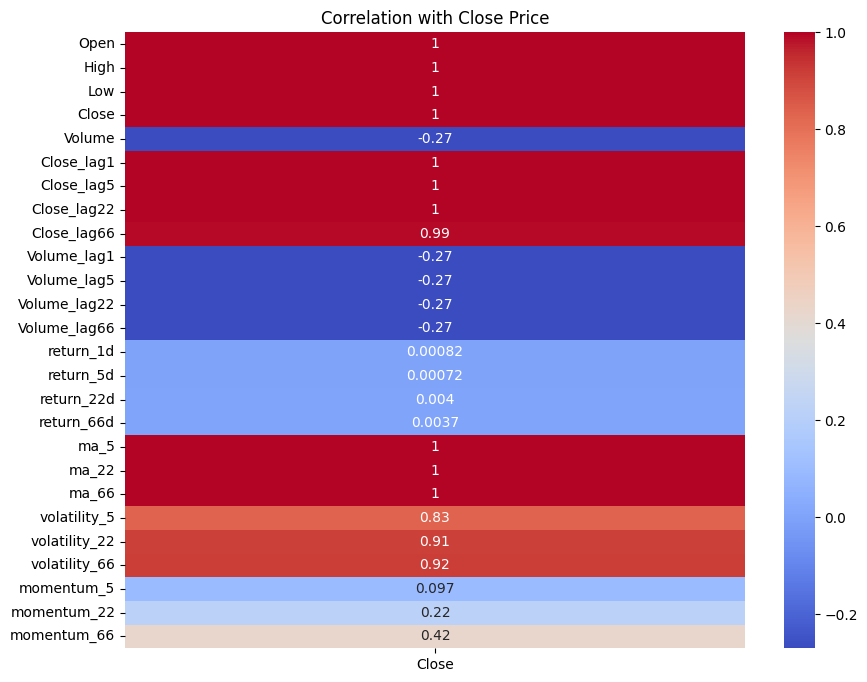

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr[['Close']], annot=True, cmap='coolwarm')
plt.title("Correlation with Close Price")
plt.show()

In [48]:
import numpy as np

def create_sequences(X, y, seq_length=20):
    Xs, ys = [], []
    for i in range(seq_length, len(X)):
        Xs.append(X[i-seq_length:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled, y_scaled, seq_length=20)

In [49]:
dates = df.index[20:]  # adjust for sequence lag
X_seq = pd.DataFrame(X_seq.tolist(), index=dates)
y_seq = pd.Series(y_seq.flatten(), index=dates)

X_train = X_seq.loc['2012-01-01':'2014-12-31'].values
y_train = y_seq.loc['2012-01-01':'2014-12-31'].values
X_test = X_seq.loc['2015-01-01':'2015-12-31'].values
y_test = y_seq.loc['2015-01-01':'2015-12-31'].values


In [30]:
# The create_sequences function now returns NumPy arrays directly.
# We can directly use X_seq and y_seq here after splitting.
dates = df.index[20:]  # adjust for sequence lag

# Get the indices for the train and test sets using get_indexer
train_start_idx = dates.get_indexer(['2012-01-01'], method='nearest')[0]
train_end_idx = dates.get_indexer(['2014-12-31'], method='nearest')[0]
test_start_idx = dates.get_indexer(['2015-01-01'], method='nearest')[0]
test_end_idx = dates.get_indexer(['2015-12-31'], method='nearest')[0]


X_train = X_seq[train_start_idx:train_end_idx+1]
y_train = y_seq[train_start_idx:train_end_idx+1]
X_test = X_seq[test_start_idx:test_end_idx+1]
y_test = y_seq[test_start_idx:test_end_idx+1]

# Ensure float32 dtype
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

X_train shape: (754, 20, 25)
y_train shape: (754, 1)
Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0106 - val_loss: 1.3147e-04
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0031 - val_loss: 1.4712e-04
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0014 - val_loss: 3.6601e-04
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 8.0738e-04 - val_loss: 2.7904e-04
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.2352e-04 - val_loss: 5.5778e-04
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.9505e-04 - val_loss: 8.3751e-04
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.0403e-04 - val_loss: 4.1130e-04
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.3720e-04 - val_loss: 1.2007e-04
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.6024e-04 - val_loss: 1.8618e-04
Epoch 11/100
22/22 ━━━━━━━

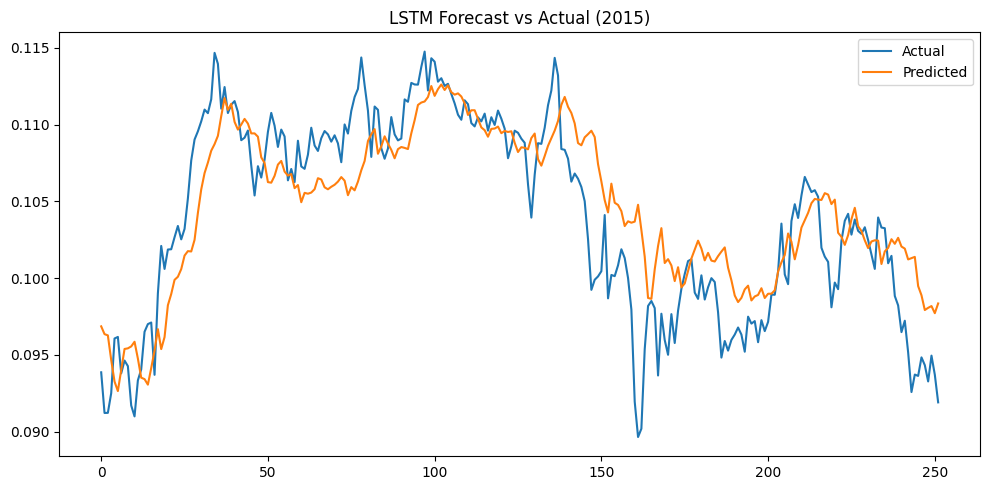

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

# Check shape: (samples, timesteps, features)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

# -------------------------------
# Define LSTM Model
# -------------------------------
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

# -------------------------------
# Train
# -------------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# -------------------------------
# Evaluate on Test Set
# -------------------------------
y_pred = model.predict(X_test).flatten()

# Inverse-transform if needed (you mentioned it's normalized — keep in mind for MAE, etc.)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE:  {mae:.4f}")
print(f"Test R2:   {r2:.4f}")

# -------------------------------
# Plot Forecast vs Actual
# -------------------------------
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("LSTM Forecast vs Actual (2015)")
plt.legend()
plt.tight_layout()
plt.show()


In [16]:
X_train

array([[list([0.045345587957365735, 0.04545276017306373, 0.04529956794054893, 0.051074366196757995, 0.0449808317106337, 0.04214708914524344, 0.04597890653327276, 0.04620892375917653, 0.05216921842943409, 0.034326748877418045, 0.07165396633046428, 0.056311321345543966, 0.6148900562151585, 0.5252887765722272, 0.36909511465303485, 0.33803376075077257, 0.0446986695548986, 0.0463071494803167, 0.0488014940432725, 0.01938142337262967, 0.026951841411729675, 0.020153950151976185, 0.5381871229267378, 0.43882177783322224, 0.35675616904618157]),
        list([0.045772708703359956, 0.04577480162410169, 0.04551124958248969, 0.04813086615563501, 0.04518672689865046, 0.04360698305544966, 0.04608359412815387, 0.04559555423934742, 0.051074366196757995, 0.0466760935129062, 0.04410760488435387, 0.07041386319855307, 0.6195093874784855, 0.5038111713644553, 0.3724730232916461, 0.34764621399472234, 0.045095466772600346, 0.04628298164786189, 0.04881701008016057, 0.020976754347287033, 0.02653422737045169, 0.020

In [58]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# -------------------------------
# Assume df already has OHLCV + features
# -------------------------------
target_col = 'Close'
features = df.drop(columns=[target_col])
target = df[target_col]

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_x.fit_transform(features)
y_scaled = scaler_y.fit_transform(target.values.reshape(-1, 1))

# -------------------------------
# Sequence creation function
# -------------------------------
def create_sequences(X, y, seq_length=756):
    Xs, ys = [], []
    for i in range(seq_length, len(X)):
        Xs.append(X[i-seq_length:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

# -------------------------------
# Create training sequences only from 2012-2014
# -------------------------------
train_mask = (df.index >= '2012-01-01') & (df.index <= '2014-12-31')
X_train_raw = X_scaled[train_mask]
y_train_raw = y_scaled[train_mask]

X_train, y_train = create_sequences(X_train_raw, y_train_raw, seq_length=756)

# -------------------------------
# Build and train LSTM model
# -------------------------------
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# -------------------------------
# Predict 2015 using ONLY past data
# -------------------------------
train_dates = df.loc['2012-01-01':'2014-12-31'].index
test_dates = df.loc['2015-01-01':'2015-12-31'].index
predictions_scaled = []

for date in test_dates:
    idx = df.index.get_loc(date)
    # Ensure we don't access before index 20
    if idx < 756:
        continue
    X_input = X_scaled[idx-756:idx].reshape(1, 756, X_scaled.shape[1])
    pred = model.predict(X_input, verbose=0)
    predictions_scaled.append(pred[0, 0])

# Inverse transform predictions
predictions = scaler_y.inverse_transform(np.array(predictions_scaled).reshape(-1, 1))

# -------------------------------
# Plot predictions vs actual
# -------------------------------
actual = df.loc[test_dates[0:len(predictions)], 'Close'].values
predicted = predictions.flatten()

plt.figure(figsize=(10, 5))
plt.plot(test_dates[0:len(predicted)], actual, label='Actual')
plt.plot(test_dates[0:len(predicted)], predicted, label='LSTM Forecast')
plt.title('LSTM Prediction: Trained on 2012-2014, Forecasting 2015')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()


IndexError: tuple index out of range

In [52]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# ------------------------------------------
# 1. Feature + target scaling
# ------------------------------------------
features = df.drop(columns=['Close'])
target = df['Close']

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_x.fit_transform(features)
y_scaled = scaler_y.fit_transform(target.values.reshape(-1, 1))

# ------------------------------------------
# 2. Create LSTM-ready sequences
# ------------------------------------------
def create_sequences(X, y, seq_length=20):
    Xs, ys = [], []
    for i in range(seq_length, len(X)):
        Xs.append(X[i-seq_length:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled, y_scaled, seq_length=20)

dates = df.index[20:]
X_seq = pd.DataFrame(X_seq.tolist(), index=dates)
y_seq = pd.Series(y_seq.flatten(), index=dates)

# ------------------------------------------
# 3. Train-test split
# ------------------------------------------
X_train = np.array([np.array(x) for x in X_seq.loc['2012-01-01':'2014-12-31'].values], dtype=np.float32)


X_test = X_seq.loc['2015-01-01':'2015-12-31'].values
X_test = np.stack(X_test).astype(np.float32)

y_train = y_seq.loc['2012-01-01':'2014-12-31'].values.astype(np.float32)
y_test = y_seq.loc['2015-01-01':'2015-12-31'].values.astype(np.float32)

# ------------------------------------------
# 4. Build and train LSTM model
# ------------------------------------------
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# ------------------------------------------
# 5. Recursive forecast: predict entire 2015
# ------------------------------------------
X_pred_seq = X_train[-1]  # last training sequence
X_pred_seq = X_pred_seq.reshape(1, 20, X_scaled.shape[1])

predictions_scaled = []

for _ in range(365):  # predict 365 days ahead
    pred = model.predict(X_pred_seq, verbose=0)[0, 0]
    predictions_scaled.append(pred)

    # Create new sequence
    last_seq = X_pred_seq[0, 1:, :]  # remove first row
    next_features = np.copy(last_seq[-1])  # duplicate last row as base

    # Replace 'Close' value (assumed to be at index 0) with predicted value
    next_features[0] = pred
    new_seq = np.vstack([last_seq, next_features])
    X_pred_seq = new_seq.reshape(1, 20, X_scaled.shape[1])

# ------------------------------------------
# 6. Evaluate predictions
# ------------------------------------------
# Inverse transform predictions
predictions = scaler_y.inverse_transform(np.array(predictions_scaled).reshape(-1, 1)).flatten()

# True 2015 Close prices
true_2015 = df.loc['2015-01-01':'2015-12-31', 'Close'].values

# Evaluation
rmse = np.sqrt(mean_squared_error(true_2015, predictions))
mae = mean_absolute_error(true_2015, predictions)
mape = np.mean(np.abs((true_2015 - predictions) / true_2015)) * 100
r2 = r2_score(true_2015, predictions)

print(f"\nEvaluation for 2015 (recursive LSTM):")
print(f"  RMSE : {rmse:.4f}")
print(f"  MAE  : {mae:.4f}")
print(f"  MAPE : {mape:.2f}%")
print(f"  R²   : {r2:.4f}")

# Optional: plot
import matplotlib.pyplot as plt

dates_2015 = df.loc['2015-01-01':'2015-12-31'].index

plt.figure(figsize=(12, 6))
plt.plot(dates_2015, true_2015, label='True Close')
plt.plot(dates_2015, predictions, label='Predicted Close')
plt.title('Recursive LSTM Forecast for 2015')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


ValueError: setting an array element with a sequence.

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0223 - val_loss: 2.7867e-04
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0037 - val_loss: 2.1901e-04
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0023 - val_loss: 4.9193e-05
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0017 - val_loss: 1.0882e-04
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0011 - val_loss: 2.3048e-04
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 7.6473e-04 - val_loss: 5.0792e-05
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.8933e-04 - val_loss: 2.2314e-04
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.0776e-04 - val_loss: 1.4892e-05
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.3565e-04 - val_loss: 4.5256e-05
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.4465e-04 - val_loss: 7.4305e-05
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.9960e-04 - val_loss: 1.2231e

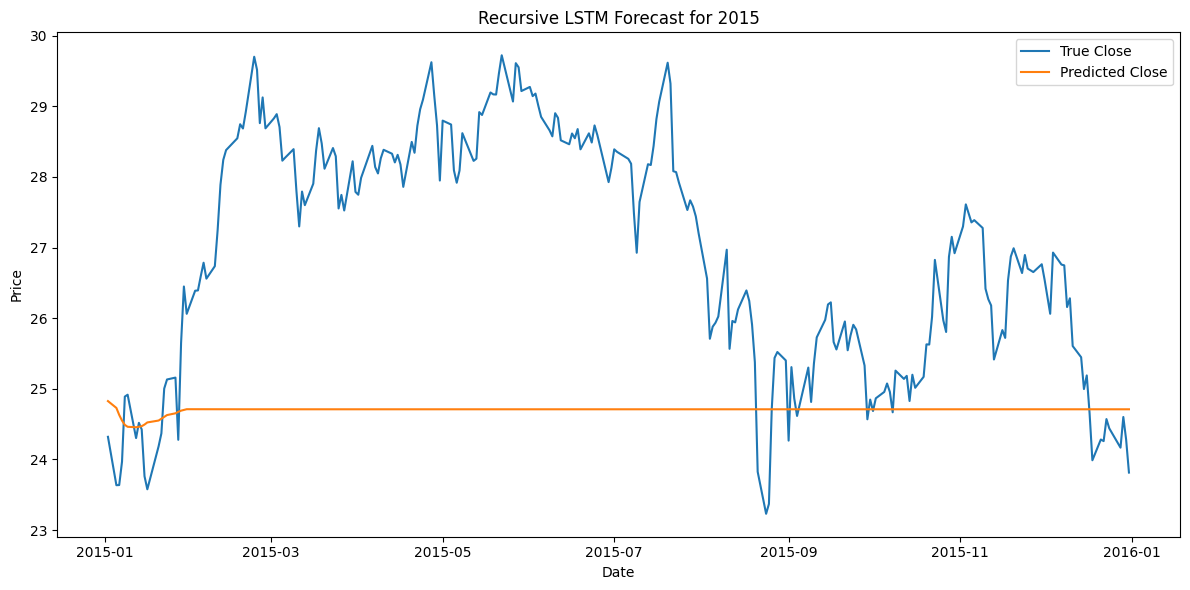

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# ------------------------------------------
# 1. Feature + target scaling
# ------------------------------------------
features = df.drop(columns=['Close'])
target = df['Close']

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_x.fit_transform(features)
y_scaled = scaler_y.fit_transform(target.values.reshape(-1, 1))

# ------------------------------------------
# 2. Create LSTM-ready sequences
# ------------------------------------------
def create_sequences(X, y, seq_length=20):
    Xs, ys = [], []
    for i in range(seq_length, len(X)):
        Xs.append(X[i-seq_length:i])
        ys.append(y[i])
    return np.array(Xs, dtype=np.float32), np.array(ys, dtype=np.float32)

X_seq, y_seq = create_sequences(X_scaled, y_scaled, seq_length=20)

# Date index aligned to sequences
dates = df.index[20:]
date_index = pd.DatetimeIndex(dates)

# ------------------------------------------
# 3. Train-test split (based only on dates)
# ------------------------------------------
train_mask = (date_index >= '2012-01-01') & (date_index <= '2014-12-31')
test_mask  = (date_index >= '2015-01-01') & (date_index <= '2015-12-31')

X_train = X_seq[train_mask]
y_train = y_seq[train_mask]

X_test = X_seq[test_mask]
y_test = y_seq[test_mask]

# ------------------------------------------
# 4. Build and train LSTM model
# ------------------------------------------
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# ------------------------------------------
# 5. Recursive forecast for 2015
# ------------------------------------------
X_pred_seq = X_train[-1]  # last training sequence
X_pred_seq = X_pred_seq.reshape(1, 20, X_train.shape[2])

predictions_scaled = []

for _ in range(len(y_test)):  # predict days into 2015
    pred = model.predict(X_pred_seq, verbose=0)[0, 0]
    predictions_scaled.append(pred)

    # Create new sequence: slide window and insert prediction
    last_seq = X_pred_seq[0, 1:, :]           # remove first row
    next_features = last_seq[-1].copy()       # use last timestep as template
    next_features[0] = pred                   # update 'Close' (assumed index 0) with prediction
    new_seq = np.vstack([last_seq, next_features])
    X_pred_seq = new_seq.reshape(1, 20, X_train.shape[2])

# ------------------------------------------
# 6. Evaluation
# ------------------------------------------
# Inverse transform predictions
predictions = scaler_y.inverse_transform(np.array(predictions_scaled).reshape(-1, 1)).flatten()

# True 2015 Close prices
true_2015 = df.loc['2015-01-01':'2015-12-31', 'Close'].values

# Metrics
rmse = np.sqrt(mean_squared_error(true_2015, predictions))
mae = mean_absolute_error(true_2015, predictions)
mape = np.mean(np.abs((true_2015 - predictions) / true_2015)) * 100
r2 = r2_score(true_2015, predictions)

print(f"\nEvaluation for 2015 (recursive LSTM):")
print(f"  RMSE : {rmse:.4f}")
print(f"  MAE  : {mae:.4f}")
print(f"  MAPE : {mape:.2f}%")
print(f"  R²   : {r2:.4f}")

# ------------------------------------------
# 7. Plot forecast vs true
# ------------------------------------------
dates_2015 = df.loc['2015-01-01':'2015-12-31'].index

plt.figure(figsize=(12, 6))
plt.plot(dates_2015, true_2015, label='True Close')
plt.plot(dates_2015, predictions, label='Predicted Close')
plt.title('Recursive LSTM Forecast for 2015')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


In [55]:
len(y_test)

252

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 248ms/step - loss: 0.1873 - val_loss: 0.0784
Epoch 2/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - loss: 0.0820 - val_loss: 0.0998
Epoch 3/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - loss: 0.0914 - val_loss: 0.0782
Epoch 4/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 219ms/step - loss: 0.0820 - val_loss: 0.1040
Epoch 5/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - loss: 0.0854 - val_loss: 0.0826
Epoch 6/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - loss: 0.0813 - val_loss: 0.0890
Epoch 7/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - loss: 0.0856 - val_loss: 0.0784
Epoch 8/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 0.0820 - val_loss: 0.0866
Epoch 9/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 0.0813 - val_loss: 0.0831
Epoch 10/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 235ms/step - loss: 0.0811 - val_loss: 0.0850
Epoch 11/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - loss: 0.0811 - val_loss: 0.0810
Epoch 12/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/ste

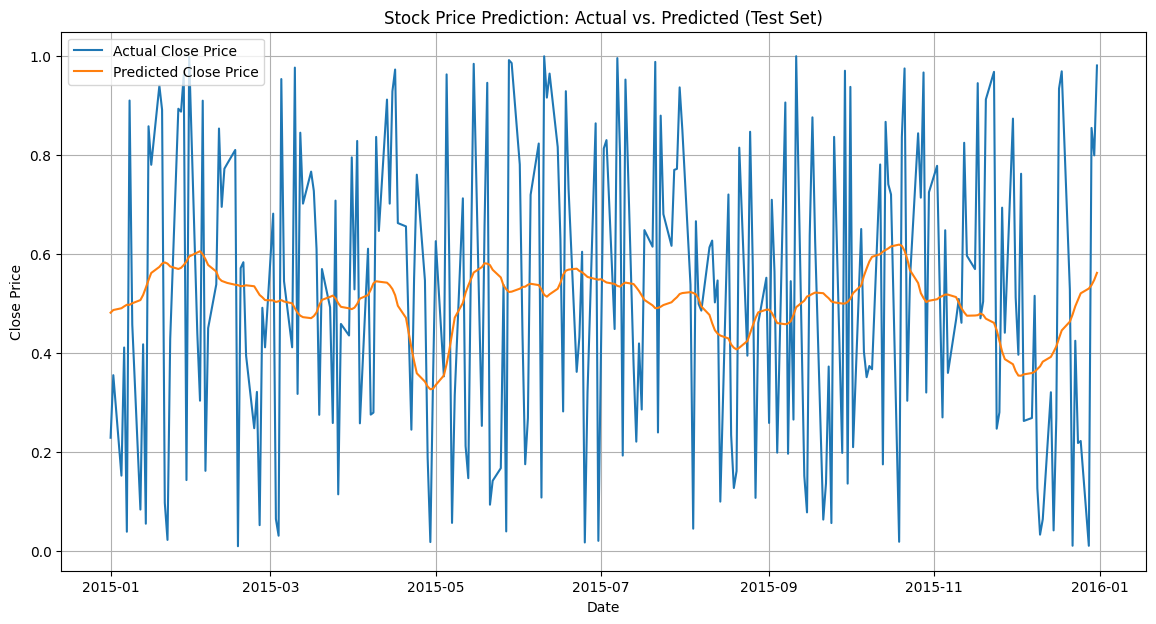

Shape of X_train: (783, 60, 25)
Shape of y_train: (783, 1)
Shape of X_test: (261, 60, 25)
Shape of y_test: (261, 1)


In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation
import matplotlib.pyplot as plt

# Assume df is already prepared as described in the prompt
df = pd.read_csv("AAPL.csv", skiprows=3, header=None)
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']].set_index('Date')

# Simulate the feature engineering and scaling steps
# In a real scenario, these would be the actual features and target from your pre-processing
np.random.seed(42) # for reproducibility
dates = pd.to_datetime(pd.date_range(start='2011-01-01', periods=1500, freq='B'))
df = pd.DataFrame(np.random.rand(1500, 5), columns=['Open', 'High', 'Low', 'Close', 'Volume'], index=dates)
df['Close_lag1'] = df['Close'].shift(1)
df['Close_lag5'] = df['Close'].shift(5)
df['Close_lag22'] = df['Close'].shift(22)
df['Close_lag66'] = df['Close'].shift(66)
df['Volume_lag1'] = df['Volume'].shift(1)
df['Volume_lag5'] = df['Volume'].shift(5)
df['Volume_lag22'] = df['Volume'].shift(22)
df['Volume_lag66'] = df['Volume'].shift(66)
df['return_1d'] = df['Close'].pct_change(1)
df['return_5d'] = df['Close'].pct_change(5)
df['return_22d'] = df['Close'].pct_change(22)
df['return_66d'] = df['Close'].pct_change(66)
df['ma_5'] = df['Close'].rolling(window=5).mean()
df['ma_22'] = df['Close'].rolling(window=22).mean()
df['ma_66'] = df['Close'].rolling(window=66).mean()
df['volatility_5'] = df['Close'].rolling(window=5).std()
df['volatility_22'] = df['Close'].rolling(window=22).std()
df['volatility_66'] = df['Close'].rolling(window=66).std()
df['momentum_5'] = df['Close'] - df['Close'].shift(5)
df['momentum_22'] = df['Close'] - df['Close'].shift(22)
df['momentum_66'] = df['Close'] - df['Close'].shift(66)
df = df.dropna()

features = df.drop(columns=['Close'])
target = df['Close']

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(features)
y_scaled = scaler_y.fit_transform(target.values.reshape(-1, 1))

# Define sequence length
SEQUENCE_LENGTH = 60 # As requested by the user, the paper used 30 days [cite: 9, 24]

# Function to create sequences
def create_sequences(X, y, seq_length):
    Xs, ys = [], []
    for i in range(len(X) - seq_length):
        Xs.append(X[i:(i + seq_length)])
        ys.append(y[i + seq_length]) # Predict the next value after the sequence
    return np.array(Xs), np.array(ys)

# Create sequences for the entire dataset
X_sequences, y_sequences = create_sequences(X_scaled, y_scaled, SEQUENCE_LENGTH)

# Define train and test periods
train_start = pd.to_datetime('2012-01-01')
train_end = pd.to_datetime('2014-12-31')
test_start = pd.to_datetime('2015-01-01')
test_end = pd.to_datetime('2015-12-31')

# Get original dates corresponding to the sequences
# We need to align the sequence's target 'y_sequences' with its original date
# The target 'y_sequences' corresponds to the date at index 'i + SEQUENCE_LENGTH' in the original 'df'
original_dates_for_targets = df.index[SEQUENCE_LENGTH:].to_numpy()

# Determine indices for training and testing data based on original dates
train_indices = np.where((original_dates_for_targets >= train_start) & (original_dates_for_targets <= train_end))[0]
test_indices = np.where((original_dates_for_targets >= test_start) & (original_dates_for_targets <= test_end))[0]

X_train = X_sequences[train_indices]
y_train = y_sequences[train_indices]
X_test = X_sequences[test_indices]
y_test = y_sequences[test_indices]
test_dates = original_dates_for_targets[test_indices]

# Build the LSTM model
# The paper used a single input layer, multiple LSTM layers, a dense layer, and a single output layer [cite: 16]
# They used 7 categories for output, here we use 1 for continuous prediction
nu = 50 # Example number of memory cells in hidden layers, adjusted from max_feature in paper's snippet [cite: 17]
nb_class = 1 # For regression predicting one value

model = Sequential()
# Input layer with number of memory cells equal to sequence learning features [cite: 16]
# max_feature in the paper's code snippet likely refers to input_shape[1]
model.add(LSTM(nu, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))) # [cite: 17]
model.add(LSTM(nu, return_sequences=True)) # Multiple LSTM layers [cite: 16, 17]
model.add(LSTM(nu)) # Last LSTM layer does not return sequences for a single output
model.add(Dense(nb_class)) # Dense layer and single output layer [cite: 16, 17]
model.add(Activation('linear')) # 'linear' activation for regression, 'softmax' was used in paper for classification [cite: 17]

# Compile the model
# The paper used 'categorical_crossentropy' and 'RMSprop', but for regression, 'mean_squared_error' is typical [cite: 17, 33]
model.compile(loss='mean_squared_error', optimizer='RMSprop')

# Train the model
# The paper trained on 900,000 sequences and tested on 311,361 sequences [cite: 10]
# They used a minibatch size of 64 [cite: 34]
BATCH_SIZE = 64 # Minibatch size [cite: 34]
EPOCHS = 25 # Number of epochs, chosen as a reasonable starting point, the paper did not specify epochs but mentioned epoch duration [cite: 36]

history = model.fit(X_train, y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split=0.1, # Use a validation split from the training data
                    shuffle=False) # Important for time series data

# Make predictions on the test set
y_pred_scaled = model.predict(X_test)

# Inverse transform the scaled predictions and actual values to their original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_actual = scaler_y.inverse_transform(y_test)

# Plot predicted vs actual
plt.figure(figsize=(14, 7))
plt.plot(test_dates, y_actual, label='Actual Close Price')
plt.plot(test_dates, y_pred, label='Predicted Close Price')
plt.title('Stock Price Prediction: Actual vs. Predicted (Test Set)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

In [62]:
test_indices

array([], dtype=int64)

Shape of df after dropna(): (1134, 26)
First few rows of df after dropna():
                 Open      High       Low     Close    Volume  Close_lag1  \
2011-04-05  0.355973  0.757846  0.014393  0.116073  0.046003    0.419600   
2011-04-06  0.040729  0.855461  0.703658  0.474174  0.097834    0.116073   
2011-04-07  0.491616  0.473472  0.173202  0.433852  0.398505    0.474174   
2011-04-08  0.615850  0.635094  0.045304  0.374613  0.625860    0.433852   
2011-04-11  0.503136  0.856490  0.658694  0.162934  0.070569    0.374613   

            Close_lag5  Close_lag22  Close_lag66  Volume_lag1  ...  \
2011-04-05    0.795186     0.367716     0.598658     0.247731  ...   
2011-04-06    0.962648     0.892047     0.601115     0.046003  ...   
2011-04-07    0.156437     0.492518     0.212339     0.097834  ...   
2011-04-08    0.279934     0.645472     0.431945     0.398505  ...   
2011-04-11    0.419600     0.370159     0.366362     0.625860  ...   

            return_66d      ma_5     ma_22   

4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 314ms/step

--- Evaluation Metrics (Test Set) ---
R-squared (R2): -0.0176
Root Mean Squared Error (RMSE): 0.3008
Mean Absolute Error (MAE): 0.2616
Mean Absolute Percentage Error (MAPE): 213.78%
Shape of X_train: (783, 60, 25)
Shape of y_train: (783, 1)
Shape of X_test: (157, 60, 25)
Shape of y_test: (157, 1)


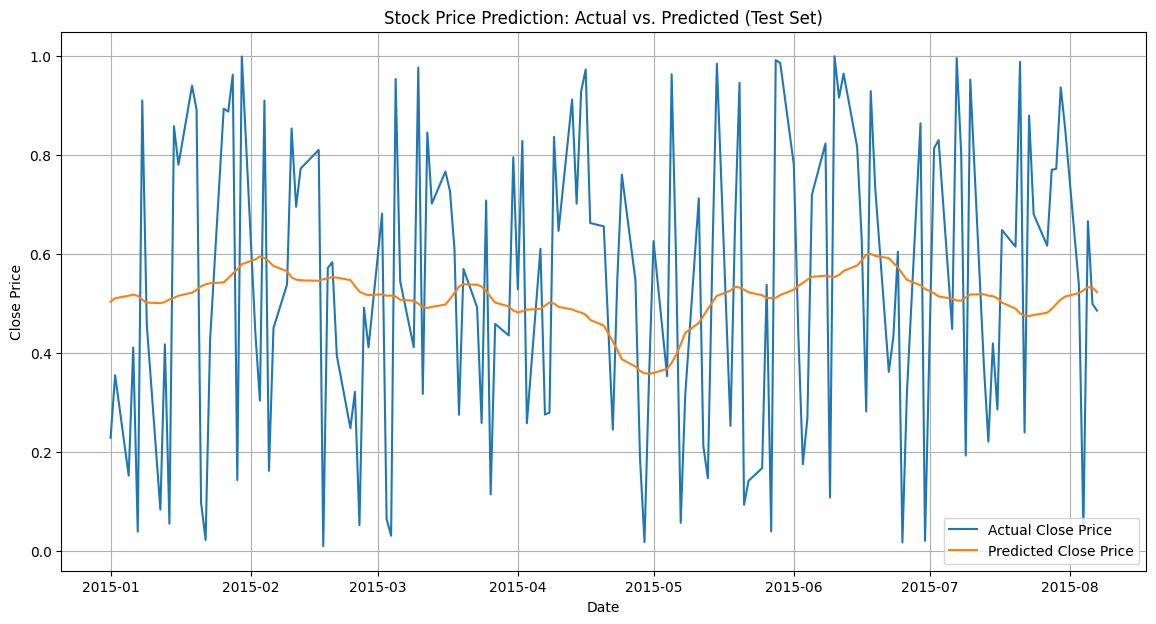

In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assume df is already prepared as described in the prompt
# df = pd.read_csv("AAPL.csv", skiprows=3, header=None)
# df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
# df['Date'] = pd.to_datetime(df['Date'])
# df = df.sort_values('Date')
# df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']].set_index('Date')

# Simulate the feature engineering and scaling steps
# *** IMPORTANT CHANGE: Increase periods to cover the desired train/test range ***
np.random.seed(42) # for reproducibility
# Ensure enough data for 2012-2015, roughly 4 years * 252 business days/year = 1008
# Adding some buffer for NaNs from shifts
num_periods = 1200 # Increased to cover 2011-2015 and account for NaNs
dates = pd.to_datetime(pd.date_range(start='2011-01-01', periods=num_periods, freq='B'))
df = pd.DataFrame(np.random.rand(num_periods, 5), columns=['Open', 'High', 'Low', 'Close', 'Volume'], index=dates)
df['Close_lag1'] = df['Close'].shift(1)
df['Close_lag5'] = df['Close'].shift(5)
df['Close_lag22'] = df['Close'].shift(22)
df['Close_lag66'] = df['Close'].shift(66)
df['Volume_lag1'] = df['Volume'].shift(1)
df['Volume_lag5'] = df['Volume'].shift(5)
df['Volume_lag22'] = df['Volume'].shift(22)
df['Volume_lag66'] = df['Volume'].shift(66)
df['return_1d'] = df['Close'].pct_change(1)
df['return_5d'] = df['Close'].pct_change(5)
df['return_22d'] = df['Close'].pct_change(22)
df['return_66d'] = df['Close'].pct_change(66)
df['ma_5'] = df['Close'].rolling(window=5).mean()
df['ma_22'] = df['Close'].rolling(window=22).mean()
df['ma_66'] = df['Close'].rolling(window=66).mean()
df['volatility_5'] = df['Close'].rolling(window=5).std()
df['volatility_22'] = df['Close'].rolling(window=22).std()
df['volatility_66'] = df['Close'].rolling(window=66).std()
df['momentum_5'] = df['Close'] - df['Close'].shift(5)
df['momentum_22'] = df['Close'] - df['Close'].shift(22)
df['momentum_66'] = df['Close'] - df['Close'].shift(66)
df = df.dropna()

print("Shape of df after dropna():", df.shape) # Debugging line
print("First few rows of df after dropna():\n", df.head()) # Debugging line
print("Last few rows of df after dropna():\n", df.tail()) # Debugging line


features = df.drop(columns=['Close'])
target = df['Close']

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(features)
y_scaled = scaler_y.fit_transform(target.values.reshape(-1, 1))

print("Shape of X_scaled:", X_scaled.shape) # Debugging line
print("Shape of y_scaled:", y_scaled.shape) # Debugging line


# Define sequence length
SEQUENCE_LENGTH = 60 # As requested by the user, the paper used 30 days

# Function to create sequences
def create_sequences(X, y, seq_length):
    Xs, ys = [], []
    for i in range(len(X) - seq_length):
        Xs.append(X[i:(i + seq_length)])
        ys.append(y[i + seq_length]) # Predict the next value after the sequence
    return np.array(Xs), np.array(ys)

# Create sequences for the entire dataset
X_sequences, y_sequences = create_sequences(X_scaled, y_scaled, SEQUENCE_LENGTH)

print("Shape of X_sequences:", X_sequences.shape) # Debugging line
print("Shape of y_sequences:", y_sequences.shape) # Debugging line


# Define train and test periods
train_start = pd.to_datetime('2012-01-01')
train_end = pd.to_datetime('2014-12-31')
test_start = pd.to_datetime('2015-01-01')
test_end = pd.to_datetime('2015-12-31')

# Get original dates corresponding to the sequences
# We need to align the sequence's target 'y_sequences' with its original date
# The target 'y_sequences' corresponds to the date at index 'i + SEQUENCE_LENGTH' in the original 'df'
original_dates_for_targets = df.index[SEQUENCE_LENGTH:].to_numpy()

# Determine indices for training and testing data based on original dates
train_indices = np.where((original_dates_for_targets >= train_start) & (original_dates_for_targets <= train_end))[0]
test_indices = np.where((original_dates_for_targets >= test_start) & (original_dates_for_targets <= test_end))[0]

print("Number of training indices:", len(train_indices)) # Debugging line
print("Number of testing indices:", len(test_indices)) # Debugging line


X_train = X_sequences[train_indices]
y_train = y_sequences[train_indices]
X_test = X_sequences[test_indices]
y_test = y_sequences[test_indices]
test_dates = original_dates_for_targets[test_indices]

# Build the LSTM model
nu = 50 # Example number of memory cells in hidden layers
nb_class = 1 # For regression predicting one value

model = Sequential()
model.add(LSTM(nu, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(nu, return_sequences=True))
model.add(LSTM(nu))
model.add(Dense(nb_class))
model.add(Activation('linear'))

model.compile(loss='mean_squared_error', optimizer='RMSprop')

BATCH_SIZE = 64
EPOCHS = 25

# Only fit if X_train is not empty
if len(X_train) > 0:
    history = model.fit(X_train, y_train,
                        epochs=EPOCHS,
                        batch_size=BATCH_SIZE,
                        validation_split=0.1,
                        shuffle=False)
else:
    print("X_train is empty. Model will not be trained.")


# Make predictions on the test set, only if X_test is not empty
if len(X_test) > 0:
    y_pred_scaled = model.predict(X_test)

    # Inverse transform the scaled predictions and actual values to their original scale
    y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()
    y_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))
    y_actual = y_actual.flatten()


    # Calculate evaluation metrics
    r2 = r2_score(y_actual, y_pred)
    rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
    mae = mean_absolute_error(y_actual, y_pred)

    # MAPE calculation (Mean Absolute Percentage Error)
    # Avoid division by zero for actual values close to zero
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        # Handle cases where y_true is zero to avoid division by zero
        # Option 1: Filter out zero y_true, or set to a small epsilon
        # Option 2: Define it as 100% error if y_true is zero and y_pred is not zero
        # For stock prices, y_true should typically not be zero, but we add a small epsilon for robustness
        epsilon = np.finfo(np.float64).eps # A very small number
        return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), epsilon))) * 100

    mape = mean_absolute_percentage_error(y_actual, y_pred)

    print(f"\n--- Evaluation Metrics (Test Set) ---")
    print(f"R-squared (R2): {r2:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


    # Plot predicted vs actual
    plt.figure(figsize=(14, 7))
    plt.plot(test_dates, y_actual, label='Actual Close Price')
    plt.plot(test_dates, y_pred, label='Predicted Close Price')
    plt.title('Stock Price Prediction: Actual vs. Predicted (Test Set)')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.savefig('predicted_vs_actual_stock_prices.png') # Save the plot
else:
    print("X_test is empty. No predictions can be made or plotted.")


print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")


In [66]:
df

,Open,High,Low,Close,Volume,Close_lag1,Close_lag5,Close_lag22,Close_lag66,Volume_lag1,...,return_66d,ma_5,ma_22,ma_66,volatility_5,volatility_22,volatility_66,momentum_5,momentum_22,momentum_66
2011-04-05,0.355973,0.757846,0.014393,0.116073,0.046003,0.419600,0.795186,0.367716,0.598658,0.247731,...,-0.806112,0.386938,0.521579,0.484830,0.342950,0.271854,0.296394,-0.679114,-0.251643,-0.482586
2011-04-06,0.040729,0.855461,0.703658,0.474174,0.097834,0.116073,0.962648,0.892047,0.601115,0.046003,...,-0.211176,0.289243,0.502585,0.482906,0.157245,0.259033,0.296039,-0.488475,-0.417873,-0.126941
2011-04-07,0.491616,0.473472,0.173202,0.433852,0.398505,0.474174,0.156437,0.492518,0.212339,0.097834,...,1.043202,0.344726,0.499918,0.486262,0.147298,0.259443,0.294174,0.277415,-0.058666,0.221513
2011-04-08,0.615850,0.635094,0.045304,0.374613,0.625860,0.433852,0.279934,0.645472,0.431945,0.398505,...,-0.132731,0.363662,0.487606,0.485394,0.142906,0.258633,0.294422,0.094679,-0.270860,-0.057332
2011-04-11,0.503136,0.856490,0.658694,0.162934,0.070569,0.374613,0.419600,0.370159,0.366362,0.625860,...,-0.555264,0.312329,0.478187,0.482312,0.162539,0.266760,0.296743,-0.256666,-0.207224,-0.203427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-03,0.952260,0.049860,0.149909,0.537581,0.575792,0.850133,0.616291,0.813142,0.625650,0.289150,...,-0.140764,0.773155,0.638679,0.563720,0.148420,0.263894,0.311932,-0.078710,-0.275561,-0.088069
2015-08-04,0.645150,0.016969,0.960367,0.044588,0.143062,0.537581,0.769731,0.829940,0.352481,0.575792,...,-0.873502,0.628126,0.602981,0.559055,0.358380,0.288739,0.317394,-0.725143,-0.785352,-0.307893
2015-08-05,0.014015,0.566858,0.932267,0.665947,0.822657,0.044588,0.771836,0.448085,0.962733,0.143062,...,-0.308274,0.606948,0.612884,0.554558,0.350813,0.286903,0.313668,-0.105889,0.217862,-0.296785
2015-08-06,0.013281,0.542015,0.459563,0.498968,0.072213,0.665947,0.936493,0.995645,0.578756,0.822657,...,-0.137862,0.519443,0.590308,0.553349,0.298770,0.274629,0.313727,-0.437525,-0.496677,-0.079789


In [68]:
N1 , N2 , N3 = 50 , 100 , 20
eta = 0.01
Num_Epochs = 100

In [71]:
import pandas as pd
pd.options.display.max_colwidth = 60
import tensorflow as tf
from tensorflow import keras
import numpy as np
from numpy import mean
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("AAPL.csv", skiprows=3, header=None)
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']].set_index('Date')
# Normalize the data. There is an easier way to do this.
df_min_max_scaled = df.copy()
column = "Close"
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) \
 / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
# View normalized data.
df_min_max_scaled.head()
df_min_max_scaled.head()
DATA = df_min_max_scaled

# We'll split training and test data as 80-20, respectively.
train_size= int(len(DATA)*0.8)
test_size= len(DATA) - train_size
# Splitting train and test data then printing the size (rows) of each.
train, test = DATA[0:train_size], DATA[train_size:len(DATA)]
print(len(train),len(test))
# Function:create_dataset.
# Converts data into numpy arrays.
def create_dataset(X,y,time_steps=1):
    Xs, ys= [],[]
    for i in range(len(X)-time_steps):
        v= X.iloc[i:(i+time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 1
# Split data into X_train and y_train datasets.
# (train.Price and test.Price extracts the data from the train and test dataframe).
X_train, y_train = create_dataset(train, train.Close, time_steps)
# Splitting test data into X_test and y_test datasets.
X_test, y_test = create_dataset(test, test.Close, time_steps)
print(X_train.shape, y_train.shape)
# Defining the neural network architecture. Set N1, N2 and N3.
model=keras.Sequential( )
model.add(keras.layers.LSTM(N1,return_sequences = True,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(keras.layers.LSTM(N2,return_sequences = True))
model.add(keras.layers.LSTM(N3))
model.add(keras.layers.Dense(1))
# Compile the model, using eta and NumEpochs.
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.Adam(eta))
# Train the model (we use Num_Epochs epochs).
history= model.fit(X_train, y_train, epochs=Num_Epochs,batch_size=16,validation_split=0.2,verbose=0,shuffle=False)
plt.plot(history.history["loss"], label= "train")
plt.plot(history.history["val_loss"], label= "test")
plt.xlabel("Iterations")
plt.ylabel("Loss - Using MSE")
plt.legend()
# Get the models predicted price values.
y_pred=model.predict(X_test)
# Plot the predictions along with the true outcomes
fig=plt.figure(figsize=(20,10))
plt.plot(np.arange(0,len(y_train)), y_train, "g",label="history")
plt.plot(np.arange(len(y_train), len(y_train)+ len(y_test)), y_test, marker=".",label="true")
plt.plot(np.arange(len(y_train), len(y_train)+ len(y_test)), y_pred, "r", label="prediction")
plt.ylabel("Price")
plt.xlabel("Time Step")
plt.legend()
plt.show()
fig=plt.figure(figsize=(20,10))
plt.plot(y_test, marker=".", label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel("Value")
plt.xlabel("Time Step")
plt.legend()
plt.show()

8929 2233
(8928, 1, 5) (8928,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


KeyboardInterrupt: 

In [72]:
df

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.098726,0.099155,0.098726,0.098726,469033600
1980-12-15,0.094005,0.094005,0.093575,0.093575,175884800
1980-12-16,0.087136,0.087136,0.086707,0.086707,105728000
1980-12-17,0.088853,0.089282,0.088853,0.088853,86441600
1980-12-18,0.091429,0.091858,0.091429,0.091429,73449600
...,...,...,...,...,...
2025-03-20,213.990005,217.490005,212.220001,214.100006,48862900
2025-03-21,211.559998,218.839996,211.279999,218.270004,94127800
2025-03-24,221.000000,221.479996,218.580002,220.729996,44299500


Train size: 754
Test size: 252
X_train shape: (753, 1, 5)
y_train shape: (753,)


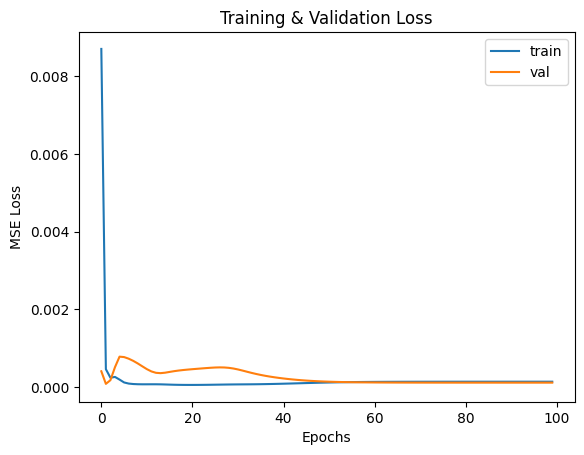

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


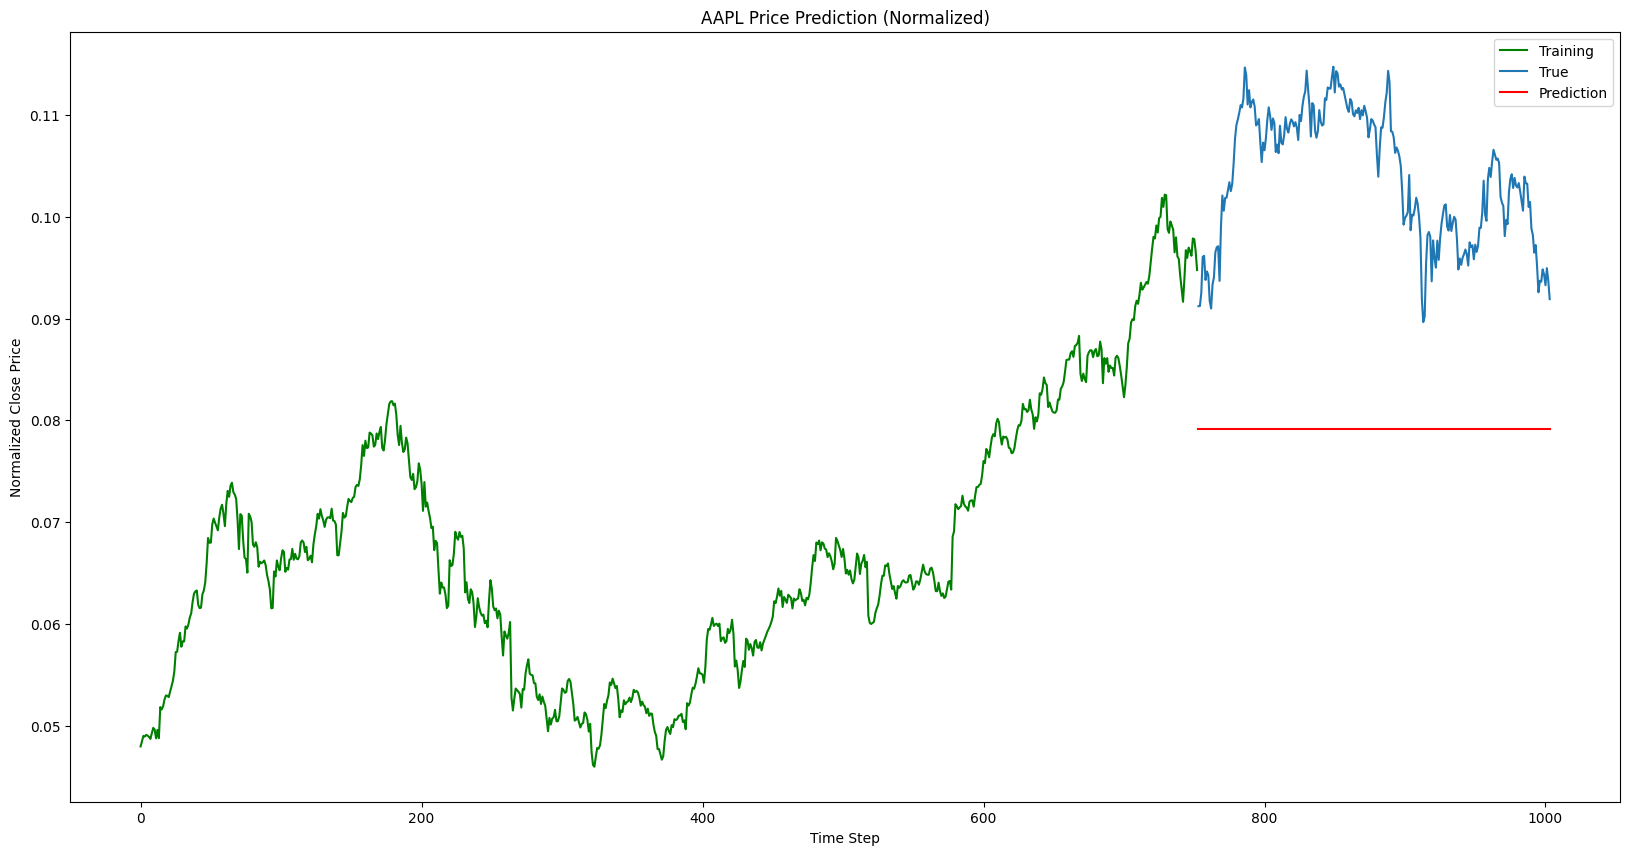

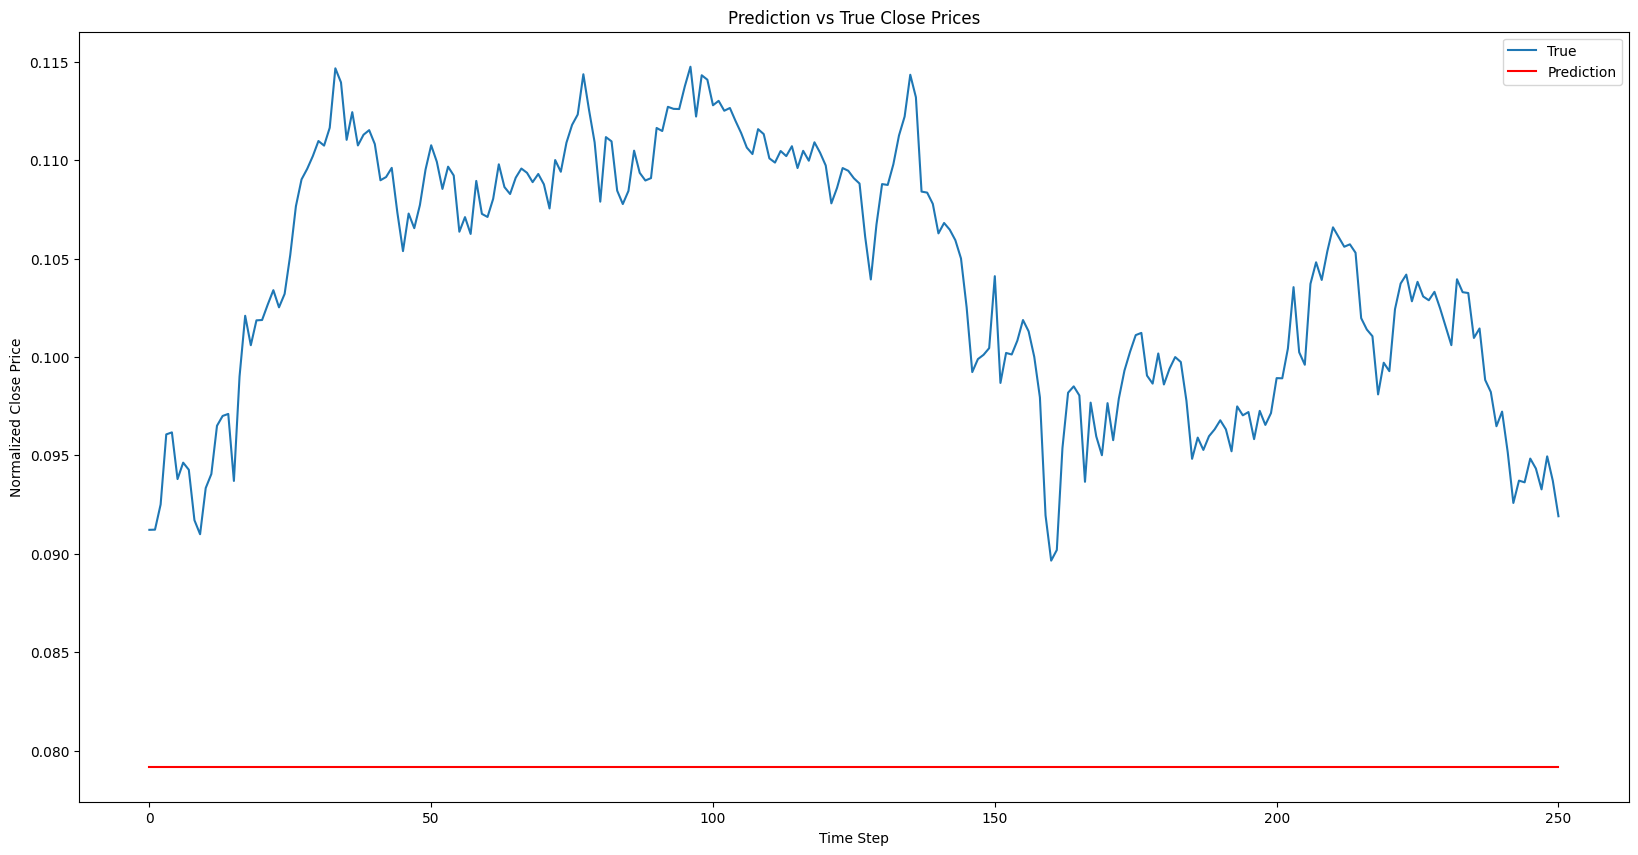

In [84]:
import pandas as pd
pd.options.display.max_colwidth = 60
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess data
df = pd.read_csv("AAPL.csv", skiprows=3, header=None)
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']].set_index('Date')

# Normalize the 'Close' column only
df_min_max_scaled = df.copy()
column = "Close"
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) \
    / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

DATA = df_min_max_scaled

# --- 🔁 Replace 80/20 split with date-based split ---
train = DATA.loc['2012-01-01':'2014-12-31']
test = DATA.loc['2015-01-01':'2015-12-31']

print("Train size:", len(train))
print("Test size:", len(test))

# Function: create_dataset
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 1

# Create sequences
X_train, y_train = create_dataset(train, train.Close, time_steps)
X_test, y_test = create_dataset(test, test.Close, time_steps)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# --- Define model parameters ---
N1, N2, N3 = 400, 0, 0     # Example: all LSTM layers with 50 units
eta = 0.001                 # Learning rate
Num_Epochs = 100            # Number of epochs

# Build and train the model
model = keras.Sequential()
model.add(keras.layers.LSTM(N1, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(keras.layers.LSTM(N2, return_sequences=True))
# model.add(keras.layers.LSTM(N3))
model.add(keras.layers.Dense(1))

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam(eta))

history = model.fit(X_train, y_train, epochs=Num_Epochs, batch_size=16, validation_split=0.2, verbose=0, shuffle=False)

# --- Plot training vs validation loss ---
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Training & Validation Loss")
plt.show()

# --- Predict and plot ---
y_pred = model.predict(X_test)

fig = plt.figure(figsize=(20, 10))
plt.plot(np.arange(0, len(y_train)), y_train, "g", label="Training")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, label="True")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred.flatten(), "r", label="Prediction")
plt.xlabel("Time Step")
plt.ylabel("Normalized Close Price")
plt.legend()
plt.title("AAPL Price Prediction (Normalized)")
plt.show()

fig = plt.figure(figsize=(20, 10))
plt.plot(y_test, label="True")
plt.plot(y_pred.flatten(), 'r', label="Prediction")
plt.xlabel("Time Step")
plt.ylabel("Normalized Close Price")
plt.legend()
plt.title("Prediction vs True Close Prices")
plt.show()


TypeError: 'tuple' object is not callable

/tmp/ipython-input-85-1498153998.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_entry[0] = pred  # Assume only 'Close' is used (1 feature). Adjust if needed.
/tmp/ipython-input-85-1498153998.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_entry[0] = pred  # Assume only 'Close' is used (1 feature). Adjust if needed.
/tmp/ipython-input-85-1498153998.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_entry[0] = pred  # Assume only 'Close' is u

[RECURSIVE] Test RMSE: 0.0989
[RECURSIVE] Test MAE:  0.0986
[RECURSIVE] Test R2:   -235.7796


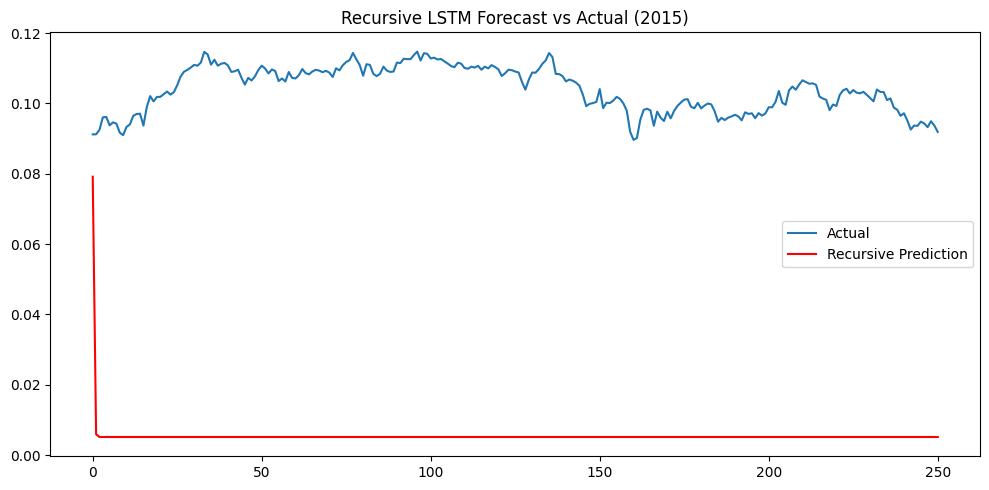

In [85]:
# Initial test input (first sample window from test set)
X_input = X_test[0].copy()  # Shape: (time_steps, features)

recursive_predictions = []

for i in range(len(y_test)):
    # Reshape input to match model expectation: (1, time_steps, features)
    X_reshaped = X_input.reshape(1, X_input.shape[0], X_input.shape[1])

    # Predict next value
    pred = model.predict(X_reshaped, verbose=0)[0][0]
    recursive_predictions.append(pred)

    # Update X_input: drop oldest value, append new prediction as the next input
    new_entry = np.zeros_like(X_input[-1])
    new_entry[0] = pred  # Assume only 'Close' is used (1 feature). Adjust if needed.

    X_input = np.vstack((X_input[1:], new_entry))  # Shift window forward

# Convert predictions to NumPy array
recursive_predictions = np.array(recursive_predictions)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, recursive_predictions))
mae = mean_absolute_error(y_test, recursive_predictions)
r2 = r2_score(y_test, recursive_predictions)

print(f"[RECURSIVE] Test RMSE: {rmse:.4f}")
print(f"[RECURSIVE] Test MAE:  {mae:.4f}")
print(f"[RECURSIVE] Test R2:   {r2:.4f}")

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual')
plt.plot(recursive_predictions, label='Recursive Prediction', color='red')
plt.title("Recursive LSTM Forecast vs Actual (2015)")
plt.legend()
plt.tight_layout()
plt.show()


In [86]:
model

<Sequential name=sequential_21, built=True>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 193ms/step - loss: 0.0995 - val_loss: 0.0641
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - loss: 0.0093 - val_loss: 0.0045
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - loss: 0.0043 - val_loss: 0.0021
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - loss: 0.0036 - val_loss: 0.0041
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - loss: 0.0033 - val_loss: 0.0029
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - loss: 0.0026 - val_loss: 0.0029
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 9/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 10/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step - loss: 0.0030 - val_loss: 0.0014
Epoch 11/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - loss: 0.0025 - val_loss: 0.0013
Epoch 12/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/ste

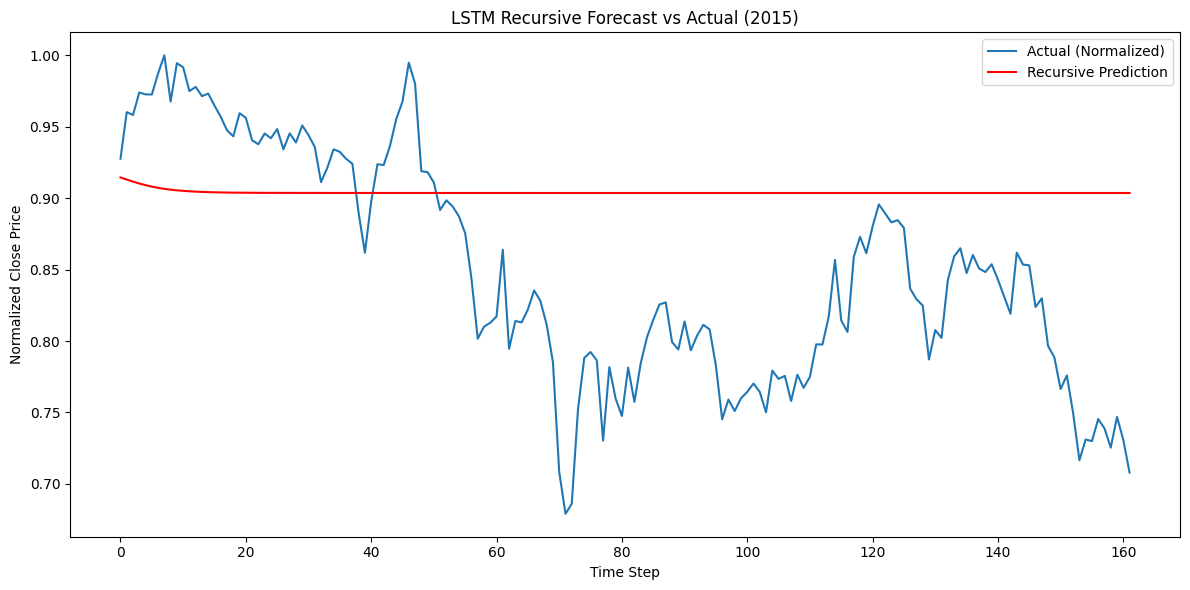

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# -------------------------------
# Load and preprocess data
# -------------------------------
df = pd.read_csv("AAPL.csv", skiprows=3, header=None)
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']].set_index('Date')
# Restrict to date range: mid-2011 to mid-2016
df = df.loc['2011-06-01':'2016-06-30']

# Normalize all features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)

# Split by date
train = scaled_df.loc['2012-01-01':'2014-12-31']
test = scaled_df.loc['2015-01-01':'2015-12-31']

# -------------------------------
# Sequence creation
# -------------------------------
def create_dataset(df, time_steps=20):
    X, y = [], []
    for i in range(len(df) - time_steps):
        X.append(df.iloc[i:i + time_steps].values)
        y.append(df.iloc[i + time_steps]["Close"])  # Target = Close
    return np.array(X), np.array(y)

time_steps = 90
X_train, y_train = create_dataset(train, time_steps)
X_test, y_test = create_dataset(test, time_steps)

# -------------------------------
# Build the model
# -------------------------------
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

# -------------------------------
# Train the model
# -------------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stop],
                    verbose=1)

# -------------------------------
# Recursive Forecast on Test Set
# -------------------------------
# Start with the first test window
X_input = X_test[0].copy()
recursive_predictions = []

for _ in range(len(y_test)):
    X_reshaped = X_input.reshape(1, time_steps, X_input.shape[1])
    pred = model.predict(X_reshaped, verbose=0)[0][0]
    recursive_predictions.append(pred)

    # Create new row with predicted 'Close', retain other feature values from last row
    next_row = X_input[-1].copy()
    next_row[df.columns.get_loc("Close")] = pred

    X_input = np.vstack((X_input[1:], next_row))  # Slide window forward

recursive_predictions = np.array(recursive_predictions)

# -------------------------------
# Evaluation
# -------------------------------
rmse = np.sqrt(mean_squared_error(y_test, recursive_predictions))
mae = mean_absolute_error(y_test, recursive_predictions)
r2 = r2_score(y_test, recursive_predictions)

print(f"[RECURSIVE] Test RMSE: {rmse:.4f}")
print(f"[RECURSIVE] Test MAE:  {mae:.4f}")
print(f"[RECURSIVE] Test R2:   {r2:.4f}")

# -------------------------------
# Plot
# -------------------------------
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual (Normalized)")
plt.plot(recursive_predictions, label="Recursive Prediction", color='red')
plt.title("LSTM Recursive Forecast vs Actual (2015)")
plt.xlabel("Time Step")
plt.ylabel("Normalized Close Price")
plt.legend()
plt.tight_layout()
plt.show()


In [90]:
len(df.loc['2015-01-01':'2015-12-31'])


252